In [20]:
!pip install multiversity pyarrow transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 41.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.6 MB/s eta 0:00:00


In [1]:
from multiversity.multicare_dataset import MedicalDatasetCreator

In [2]:
from backend_central_dev.data_processing import dataset_utils

multicare_data_dir = dataset_utils.get_dataset_base('multicare')
multicare_data_dir

'/Users/yinnnyou/autodl-tmp/ml_data/multicare'

In [3]:
mdc = MedicalDatasetCreator(directory=multicare_data_dir)

The MultiCaRe Dataset is already downloaded.
Importing and pre-processing the main files.
Done!


In [4]:
filters = [
    {'field': 'min_year', 'string_list': ['2015']},
    {'field': 'min_age', 'string_list': ['18']},
    # {'field': 'gender', 'string_list': ['Male']},
    # {'field': 'case_strings', 'string_list': [
    #     'tumor', 'cancer', 'carcinoma'], 'operator': 'any'},
    # {'field': 'caption', 'string_list': [
    #     'metastasis', 'tumor', 'mass'], 'operator': 'any'},
    {'field': 'label', 'string_list': ['thorax', 'radiology', 'x_ray']},
]

In [5]:
mdc.create_dataset(
    dataset_name='multicare_radiology_thorax_xray',
    filter_list=filters,
    dataset_type='multimodal'
)

The multicare_radiology_thorax_xray was successfully created!


In [6]:
mdc.filtered_image_metadata_df

,file_id,file,file_path,main_image,case_id,license,file_size,split_during_preprocessing,caption,image_type,image_subtype,radiology_region,radiology_region_granular,radiology_view,ml_labels_for_supervised_classification,gt_labels_for_semisupervised_classification
0,file_0000013,PMC10006502_gr1_undivided_1_1.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10006502_01_gr1.jpg,PMC10006502_01,CC BY-NC-ND,15658,True,Chest radiograph on admission showing pleural ...,radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]","[radiology, thorax, x_ray]"
1,file_0000038,PMC10009051_gr1_A_1_2.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10009051_01_gr1.jpg,PMC10009051_01,CC BY-NC-ND,5936,False,(A): Chest x-ray on Day 1 revealed multiple lu...,radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]","[radiology, thorax, x_ray]"
2,file_0000046,PMC10009052_gr1_undivided_1_1.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10009052_01_gr1.jpg,PMC10009052_01,CC BY,16308,True,Chest X-ray posterior-anterior view showing bi...,radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]","[radiology, thorax, frontal, posteroanterior, ..."
3,file_0000068,PMC10010120_IMCRJ-16-129-g0006_undivided_1_1.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10010120_01_IMCRJ-16-129-g0006.jpg,PMC10010120_01,CC BY-NC,11100,True,A chest x-ray image showed a ground glass appe...,radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]","[radiology, thorax, x_ray]"
4,file_0000130,PMC10011863_med-07-4-f1_A_1_2.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10011863_01_med-07-4-f1.jpg,PMC10011863_01,CC BY-NC-ND,10618,False,"Both preoperative chest X-ray ,axial CT-scan w...",radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]",[radiology]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,file_0161579,PMC11380887_SNI-15-306-g003_c_3_3.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC11380887_01_SNI-15-306-g003.jpg,PMC11380887_01,CC BY-NC-SA,4890,False,(c) Chest X-ray on Day 12 shows improvement in...,radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]","[radiology, thorax, x_ray]"
3228,file_0161660,PMC11381457_gr1_A_1_5.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC11381457_01_gr1.jpg,PMC11381457_01,CC BY-NC-ND,11398,False,(A) A chest X-ray taken at the first visit sho...,radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]","[radiology, thorax, x_ray, mass]"
3229,file_0161662,PMC11381457_gr1_C_3_5.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC11381457_01_gr1.jpg,PMC11381457_01,CC BY-NC-ND,2470,False,(B and C) Computed tomography reveals a mass i...,radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]",[]
3230,file_0161663,PMC11381457_gr1_D_4_5.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC11381457_01_gr1.jpg,PMC11381457_01,CC BY-NC-ND,1756,False,(D) A chest X-ray taken in the emergency room ...,radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]","[radiology, thorax, x_ray]"


In [48]:
mdc.filtered_image_metadata_df['image_subtype'].unique()

array(['x_ray'], dtype=object)

**Case PMC10009051_01:**

'Gender: Unknown'

'Age: 45'

'Clinical Case:'

"A 45-year-old, men who have sex with men (MSM) patient with no significant, past medical history presented with the complaint of one week's duration of abdominal pain and fever of later onset (Day 1). The patient reported a weight loss of 10 kg over the past two months but denied respiratory symptoms, such as cough, dyspnea, and sputum, and asthenia. Physical examination revealed body temperature 37.9 C, heart rate 125 beats per minute, respiratory rate 20 breaths per minute, and oxygen saturation 95% on ambient air. Physical examination revealed normal lung sounds and no abdominal mass and tenderness. Laboratory tests revealed normal leucocytes (8200/muL) with lymphopenia (lymphocyte count 650/muL) and a low CD4 count (14/muL), anemia (hemoglobin 10.7 g/dL), thrombocytopenia (platelets 136,000/muL), hypoalbuminemia (albumin 2.7 g/dL), elevated lactate dehydrogenase (277 IU/L), C-reactive protein (29.41 mg/dL), serum beta-d-Glucan 127.6 pg/mL (positive >= 80 pg/mL), and 54,000 copies/

**Image:**

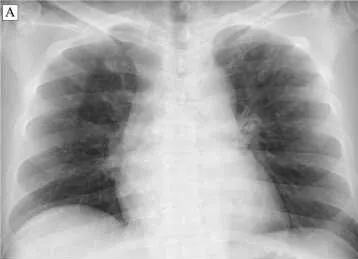

**Image Labels:**

['radiology', 'thorax', 'x_ray', 'thorax', 'radiology', 'frontal', 'x_ray']

**Image Caption:**

(A): Chest x-ray on Day 1 revealed multiple lung cysts.

**Citation Information:**

{'pmcid': 'PMC10009051',
 'doi': '10.1016/j.idcr.2023.e01729',
 'pmid': '36923657',
 'title': 'Immune reconstitution inflammatory syndrome in splenic Pneumocystis jirovecii infection: A case report',
 'year': '2023',
 'authors': ['Hiroki Kojima', 'Masaru Tanaka', 'Akifumi Imamura'],
 'journal': 'IDCases',
 'journal_detail': '2023 Feb 28;31:e01729.',
 'link': 'https://pubmed.ncbi.nlm.nih.gov/36923657/',
 'license': 'CC BY-NC-ND'}

In [8]:
mdc.display_example(image_index=1)

In [20]:
import pandas as pd

# Assuming the JSON file path is stored in a variable named json_file_path
json_file_path = '/Users/yinnnyou/autodl-tmp/ml_data/multicare/multicare_radiology/image_metadata.json'

# Read the JSON file into a DataFrame
df_json = pd.read_json(json_file_path, orient='records', lines=True)

df_json

,file_id,file,file_path,main_image,case_id,license,file_size,split_during_preprocessing,caption,image_type,image_subtype,radiology_region,radiology_region_granular,radiology_view,ml_labels_for_supervised_classification,gt_labels_for_semisupervised_classification
0,file_0000013,PMC10006502_gr1_undivided_1_1.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10006502_01_gr1.jpg,PMC10006502_01,CC BY-NC-ND,15658,True,Chest radiograph on admission showing pleural ...,radiology,x_ray,thorax,thorax,frontal,"[thorax, radiology, frontal, x_ray]","[radiology, thorax, x_ray]"
1,file_0000021,PMC10007704_PAMJ-43-188-g001_undivided_1_1.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10007704_01_PAMJ-43-188-g001.jpg,PMC10007704_01,CC BY,8534,True,transthoracic echocardiography showing ventric...,radiology,ultrasound,thorax,thorax,ultrasound_view,"[thorax, radiology, ultrasound_view, ultrasoun...","[radiology, thorax, ultrasound, transthoracic,..."
2,file_0000022,PMC10007704_PAMJ-43-188-g002_undivided_1_1.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10007704_01_PAMJ-43-188-g002.jpg,PMC10007704_01,CC BY,7098,True,massive dilatation of the main pulmonary arter...,radiology,ultrasound,thorax,thorax,ultrasound_view,"[thorax, radiology, ultrasound_view, ultrasoun...",[]
3,file_0000023,PMC10008024_IMCRJ-16-117-g0002_undivided_1_1.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10008024_01_IMCRJ-16-117-g0002.jpg,PMC10008024_01,CC BY-NC,27958,True,Preoperative pelvic magnetic resonance imaging...,radiology,mri,pelvis,pelvis,sagittal,"[pelvis, radiology, sagittal, mri]","[radiology, t2, pelvis, mri, mass, spin_echo]"
4,file_0000029,PMC10008137_JRI-24-63-g002_C_3_3.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC10008137_01_JRI-24-63-g002.jpg,PMC10008137_01,CC BY-NC,16522,False,Gross specimen of serous cystadenoma of the ri...,radiology,ct,thorax,thorax,frontal,"[thorax, radiology, frontal, ct]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55837,file_0161691,PMC11384573_fimmu-15-1450490-g002_A_1_4.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC11384573_01_fimmu-15-1450490-g002.jpg,PMC11384573_01,CC BY,2840,False,Patient clinical photos after treatment and di...,radiology,x_ray,upper_limb,elbow,occlusal,"[radiology, upper_limb, occlusal, elbow, x_ray]",[]
55838,file_0161696,PMC9970933_gr1_lrg_A_1_4.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC9970933_01_gr1_lrg.jpg,PMC9970933_01,NO-CC CODE,10304,False,(A) Initial ultrasound scan. Adenopathy at Ber...,radiology,ultrasound,abdomen,abdomen,axial,"[abdomen, radiology, axial, ultrasound]","[radiology, ultrasound]"
55839,file_0161697,PMC9970933_gr1_lrg_B_2_4.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC9970933_01_gr1_lrg.jpg,PMC9970933_01,NO-CC CODE,6406,False,(B and C) Follow-up ultrasound scan 6 weeks af...,radiology,ultrasound,breast,breast,axial,"[breast, radiology, axial, ultrasound]","[radiology, ultrasound]"
55840,file_0161698,PMC9970933_gr1_lrg_C_3_4.webp,/Users/yinnnyou/autodl-tmp/ml_data/multicare/m...,PMC9970933_01_gr1_lrg.jpg,PMC9970933_01,NO-CC CODE,10448,False,(B and C) Follow-up ultrasound scan 6 weeks af...,radiology,ultrasound,lower_limb,thigh,ultrasound_view,"[radiology, lower_limb, ultrasound_view, ultra...","[radiology, ultrasound]"
